In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from dataset import Dataset

I_scale = 10.0
dataset = Dataset(scale=I_scale)

In [37]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
21.438894
-0.016897107


In [38]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.0005 # rの学習率
#k2 = 0.0001 # Uの学習率

#k1 = 0.0005 # rの学習率
#k2 = 0.001 # Uの学習率

k1 = 0.0005 # rの学習率
k2 = 0.002 # Uの学習率

U_scale = 7.0

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

iteration = 20

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = dataset.get_image(k, j)
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=0.007442465556619756 std=2.021504010699065
rs mean=9.664548651731531e-17 std=4.009312135913411e-16
us mean=0.006455974624849051 std=1.8702561587806836
rs mean=-0.0022898141760379076 std=0.011775937862694263
us mean=0.005705843283559447 std=1.7359560641053602
rs mean=-0.006569365505129099 std=0.11322422325611115
us mean=0.0035365793519590138 std=1.6177557067706583
rs mean=-0.009745150804519653 std=0.17780046164989471
us mean=0.0027860976232422976 std=1.5128915187634737
rs mean=2.3014893675502165e-16 std=1.1067969881117497e-15
us mean=0.0011889484923620665 std=1.420453916376889
rs mean=-0.013972253538668156 std=0.08108889311552048
us mean=-0.005376150721301744 std=1.5067441394119627
rs mean=0.0002496689558029175 std=1.0446441173553467
us mean=-0.0008122011371381396 std=1.6620115344765363
rs mean=-0.07355203479528427 std=0.7434974908828735
us mean=0.0020660879218370835 std=1.7016806560563598
rs mean=-0.045107413083314896 std=0.48611193895339966
us mean=0.011709945887214142 std=1.7

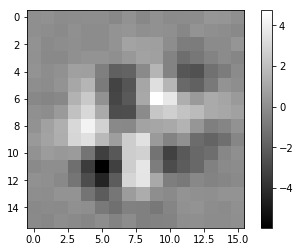

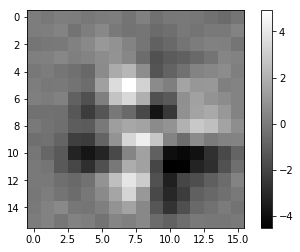

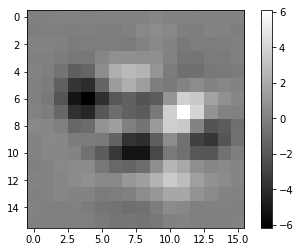

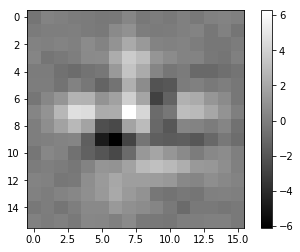

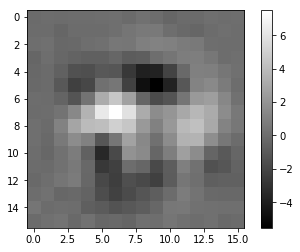

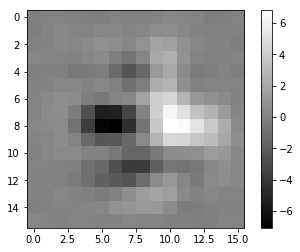

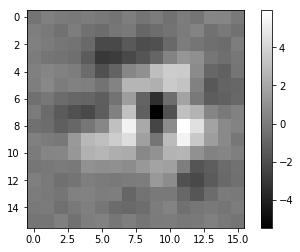

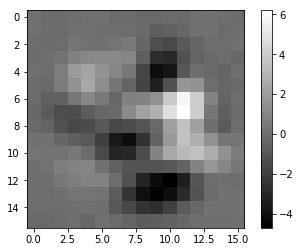

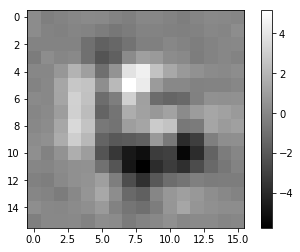

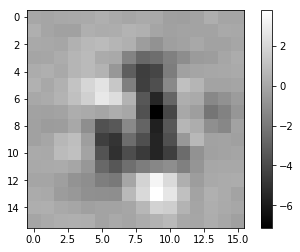

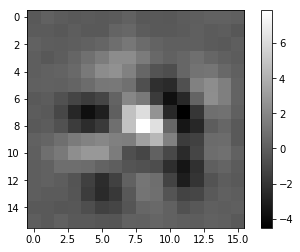

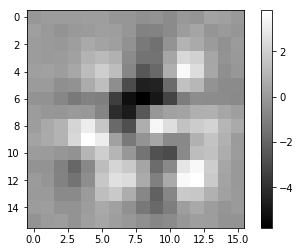

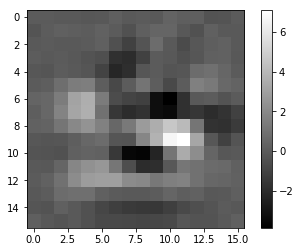

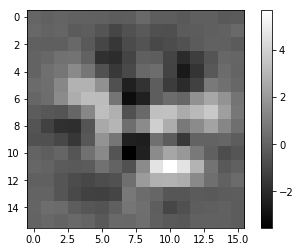

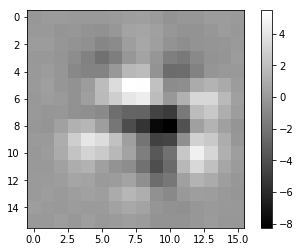

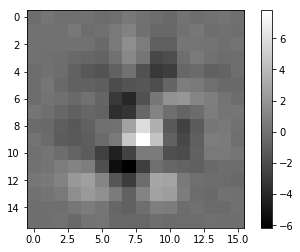

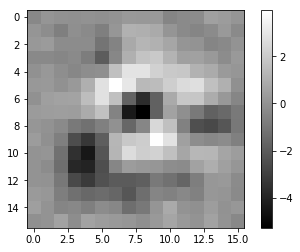

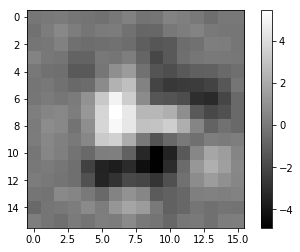

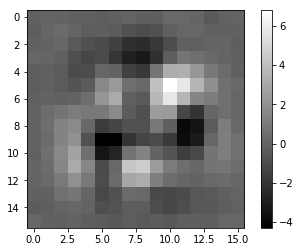

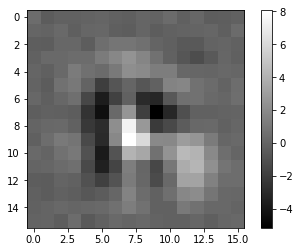

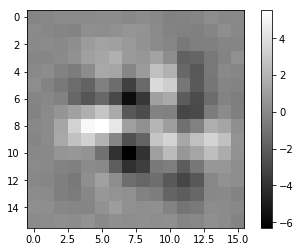

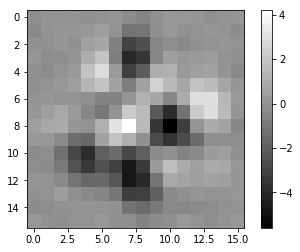

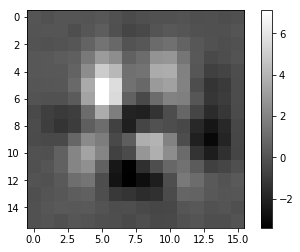

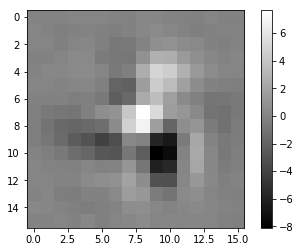

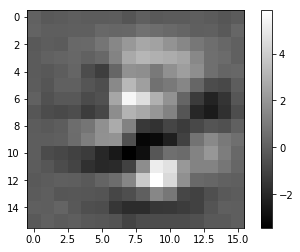

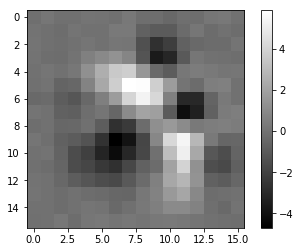

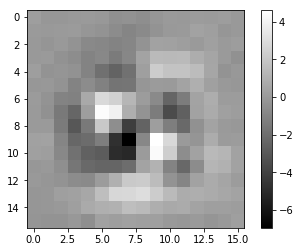

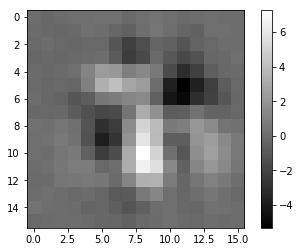

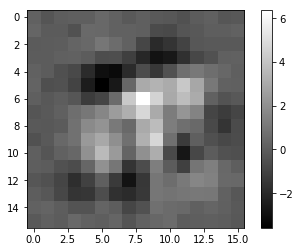

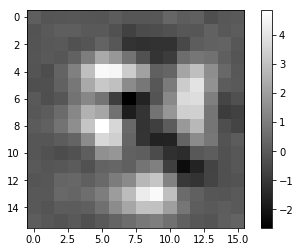

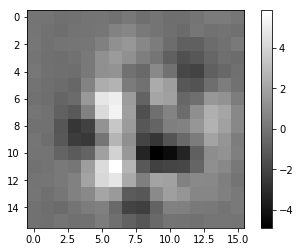

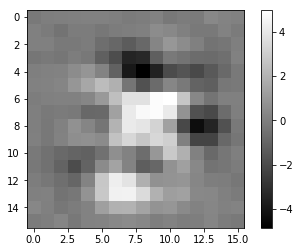

In [39]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

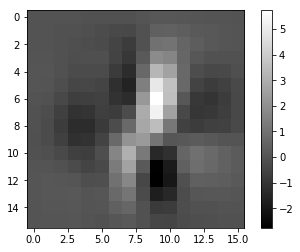

In [21]:
I = dataset.get_image(500, 0)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[-0.14858988 -0.09153912 -0.05280362 -0.07526027  0.1602873  -0.12850195
 -0.10305458 -0.063652    0.0134041  -0.00976942 -0.20681001 -0.09079702
 -0.00348466  0.02428623 -0.04483243  0.13046724 -0.01510886  0.15750541
  0.04212702 -0.05615805  0.04540759  0.20064634 -0.2023966  -0.02819276
  0.10189188 -0.11950164 -0.11420532  0.0188754  -0.13061634  0.09821185
 -0.02817071 -0.05761   ]


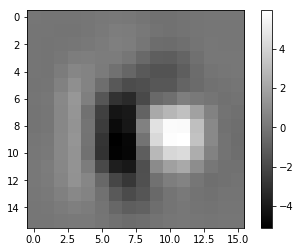

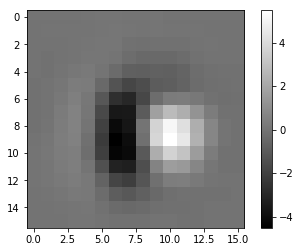

In [34]:
image_index = 505
I = dataset.get_image(image_index, 0)
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(2):
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()